# CMIP6 Compute Evaporation

**Following steps are included in this script:**

1. Load netCDF files
2. Compute Evaporation

Save and replace netcdf files

In [1]:
# ========== Packages ==========
import sys
import os
import xarray as xr
import numpy as np
import dask
from dask.diagnostics import ProgressBar
import importlib
import copy

# Define the full path to the data_handling directory and the config file
data_handling_dir = '/work/ch0636/g300115/phd_project/common/src/data_handling'
config_dir = '/work/ch0636/g300115/phd_project/common/src'

# Add the directories to sys.path
sys.path.append(data_handling_dir)
sys.path.append(config_dir)

# Now import the functions from load_preprocessed_data.py and config
import load_data as ld
import save_data_as_nc as sd
from config import BASE_DIR, DEFAULT_MODEL, DEFAULT_VARIABLE, DEFAULT_TEMPORAL_RES, DEFAULT_EXPERIMENT

### Functions

In [15]:
def compute_evapo(ds_dict):

    ds_dict_copy = copy.deepcopy(ds_dict)
    
    for name, ds in ds_dict_copy.items():
        # Compute evapo as the difference between evspsbl and tran
        ds['evapo'] = ds['evspsbl'] - ds['tran']
        
        # Compute evapo as the difference between evspsbl and tran
        ds['evapo'] = ds['evspsbl'] - ds['tran']
        
        # Assign attributes to evapo
        ds['evapo'].attrs = {'standard_name': 'water_evaporation_flux',
                             'long_name': 'Evaporation',
                             'comment': 'Evaporation at surface: flux of water into the atmosphere due to conversion of both liquid and solid phases to vapor (from underlying surface) - excluding transpiration',
                             'cell_methods': 'area: time: mean (interval: 5 minutes)',
                             'cell_measures': 'area: areacella',
                             'units': 'mm/day',
                             'log': 'Negative values are set to 0'}
        
        # Drop the original variables if they are no longer needed
        ds = ds.drop_vars(['tran', 'evspsbl'])
        
        # Update the dictionary with the modified dataset
        ds_dict_copy[name] = ds
        
    return ds_dict_copy

### 1. Load netCDF files

In [21]:
# ========= Define period, models and path ==============
data_state = 'processed'
data_product = 'CMIP6'
experiments = ['ssp370']
temp_res = 'month'
models = ['BCC-CSM2-MR', 'CAMS-CSM1-0', 'CESM2-WACCM', 'CNRM-ESM2-1', 'GISS-E2-1-G', 'MIROC-ES2L', 'NorESM2-MM', 'UKESM1-0-LL', 'CanESM5', 'CNRM-CM6-1', 'GFDL-ESM4', 'MPI-ESM1-2-LR', 'TaiESM1']
variables=['evspsbl', 'tran'] 
           
# Execute load function with Dask
with ProgressBar():
    ds_dict = dask.compute(ld.load_multiple_models_and_experiments(BASE_DIR, data_state, data_product, experiments, temp_res, models, variables))[0]

[########################################] | 100% Completed | 22.09 s


['historical']


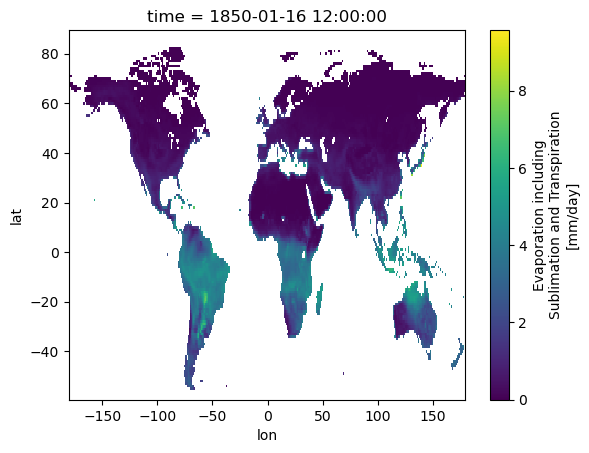

In [4]:
# ========= Have a look into the dictionary =======
print(list(ds_dict.keys()))
ds_dict[list(ds_dict.keys())[0]][models[0]][variables[0]].isel(time=0).plot()

### Compute Evapo

In [22]:
ds_dict_evapo = {}
ds_dict_evapo = compute_evapo(ds_dict[experiments[0]])

In [23]:
# ========= Have a look into the dictionary =======
print(list(ds_dict_evapo.keys()))
ds_dict_evapo[list(ds_dict_evapo.keys())[0]]#[variables[0]].isel(time=0).plot()

['BCC-CSM2-MR', 'CAMS-CSM1-0', 'CESM2-WACCM', 'CNRM-ESM2-1', 'GISS-E2-1-G', 'MIROC-ES2L', 'NorESM2-MM', 'UKESM1-0-LL', 'CanESM5', 'CNRM-CM6-1', 'GFDL-ESM4', 'MPI-ESM1-2-LR', 'TaiESM1']


<xarray.Dataset>
Dimensions:  (time: 1032, lat: 149, lon: 360)
Coordinates:
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lat      (lat) int64 -59 -58 -57 -56 -55 -54 -53 ... 83 84 85 86 87 88 89
  * lon      (lon) int64 -180 -179 -178 -177 -176 -175 ... 175 176 177 178 179
Data variables:
    evapo    (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes: (12/67)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      ScenarioMIP
    branch_method:                    Standard
    branch_time_in_child:             0.0
    branch_time_in_parent:            2015.0
    comment:                          This is an extension of historical simu...
    ...                               ...
    intake_esm_attrs:time_min:        201501.0
    intake_esm_attrs:time_max:        210012.0
    intake_esm_attrs:_data_format_:   netcdf
    intake_esm_dataset_key:           ScenarioMIP.BCC-CSM2-MR.ssp370.Lmon.gn
    log:                              Unit of tas converted from K to °C. // ...
    regrid_method:                    conservative

### Save files

In [24]:
# =========== Store file and remove any former one ==========
# Base directory
data_path = f'{data_state}/{data_product}/{experiments[0]}/{temp_res}/'
file_path = os.path.join(BASE_DIR, data_path)
print(file_path)

/work/ch0636/g300115/phd_project/common/data/processed/CMIP6/ssp370/month/


In [25]:
sd.save_files(ds_dict_evapo, file_path)

File /work/ch0636/g300115/phd_project/common/data/processed/CMIP6/ssp370/month/evapo/BCC-CSM2-MR.nc removed
File saved at: /work/ch0636/g300115/phd_project/common/data/processed/CMIP6/ssp370/month/evapo/BCC-CSM2-MR.nc
File /work/ch0636/g300115/phd_project/common/data/processed/CMIP6/ssp370/month/evapo/CAMS-CSM1-0.nc removed
File saved at: /work/ch0636/g300115/phd_project/common/data/processed/CMIP6/ssp370/month/evapo/CAMS-CSM1-0.nc
File /work/ch0636/g300115/phd_project/common/data/processed/CMIP6/ssp370/month/evapo/CESM2-WACCM.nc removed
File saved at: /work/ch0636/g300115/phd_project/common/data/processed/CMIP6/ssp370/month/evapo/CESM2-WACCM.nc
File /work/ch0636/g300115/phd_project/common/data/processed/CMIP6/ssp370/month/evapo/CNRM-ESM2-1.nc removed
File saved at: /work/ch0636/g300115/phd_project/common/data/processed/CMIP6/ssp370/month/evapo/CNRM-ESM2-1.nc
File /work/ch0636/g300115/phd_project/common/data/processed/CMIP6/ssp370/month/evapo/GISS-E2-1-G.nc removed
File saved at: /work